In [1]:
import matplotlib.pyplot as plt

from bandits import average_finder
from strategies import *

In [2]:
machine_no = 100
trial_no = 20000
gaussian = True
number_of_iterations = 50
numbers_to_try = [0.5, 1, 1.5, 2, 2.5, 3, 4, 5]

In [3]:
def strategy_average(plot_object, number_of_its: int, number_machine: int,
                     number_trial: int, epsilon_value,
                     gaussian_bool=False):
    regret_list = []
    for iteration in range(number_of_its):
        env = ucb_strategy(number_machine, number_trial,
                           confidence_level=epsilon_value,
                           gaussian=gaussian_bool)
        if len(env.regret) != number_trial:
            env.update()
        regret_list.append(env.regret)
    averages = average_finder(regret_list, number_trial,
                              number_of_its)
    plot_object.plot(range(len(averages)), averages, alpha=0.5, lw=2,
                     label=str(epsilon_value))
    return

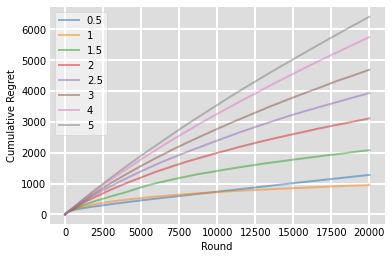

In [4]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
for epsilon in numbers_to_try:
    strategy_average(plot_object=ax, number_of_its=number_of_iterations,
                     number_machine=machine_no, number_trial=trial_no,
                     epsilon_value=epsilon, gaussian_bool=gaussian)
ax.set_xlabel('Round')
ax.set_ylabel('Cumulative Regret')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='both', c='w', lw=2, ls='-')
# plt.title("")
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('ucb_plot.png', dpi=1000, transparent=False,
            bbox_inches='tight')
plt.show()